In [1]:
# Importation
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
data = pd.read_csv('data.csv', parse_dates=['date'])
data.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [3]:
# We are just seeing the layout of the data and the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398852 entries, 0 to 398851
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    398852 non-null  datetime64[ns]
 1   county  398852 non-null  object        
 2   state   398852 non-null  object        
 3   fips    394858 non-null  float64       
 4   cases   398852 non-null  int64         
 5   deaths  398852 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 18.3+ MB


In [4]:
# The columns & rows of the master df
data.shape

(398852, 6)

In [5]:
# dropping cols & setting the staes as index
cols = ['fips']
data.drop(cols, axis= 1, inplace=True)
data = data.set_index('state')
data.index

Index(['Washington', 'Washington', 'Washington', 'Illinois', 'Washington',
       'California', 'Illinois', 'Washington', 'Arizona', 'California',
       ...
       'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming',
       'Wyoming', 'Wyoming', 'Wyoming', 'Wyoming'],
      dtype='object', name='state', length=398852)

In [6]:
#just making sure the code worked
data.head()

,date,county,cases,deaths
state,,,,
Washington,2020-01-21,Snohomish,1,0
Washington,2020-01-22,Snohomish,1,0
Washington,2020-01-23,Snohomish,1,0
Illinois,2020-01-24,Cook,1,0
Washington,2020-01-24,Snohomish,1,0


In [7]:
# resetting the index so setting the index is easier
df = data.loc[['South Carolina']].reset_index()
df.head()

,state,date,county,cases,deaths
0,South Carolina,2020-03-06,Charleston,1,0
1,South Carolina,2020-03-06,Kershaw,1,0
2,South Carolina,2020-03-07,Charleston,1,0
3,South Carolina,2020-03-07,Kershaw,1,0
4,South Carolina,2020-03-08,Charleston,1,0


In [8]:
df.shape

(6280, 5)

In [9]:
# finding unique values in the df
county = df.county.unique()

In [10]:
county.shape

(46,)

In [11]:
# setting the date column as index
df = df.set_index('date')

In [14]:
# Grouping the cases and counties
df1 = df.groupby('county')['cases'].sum()

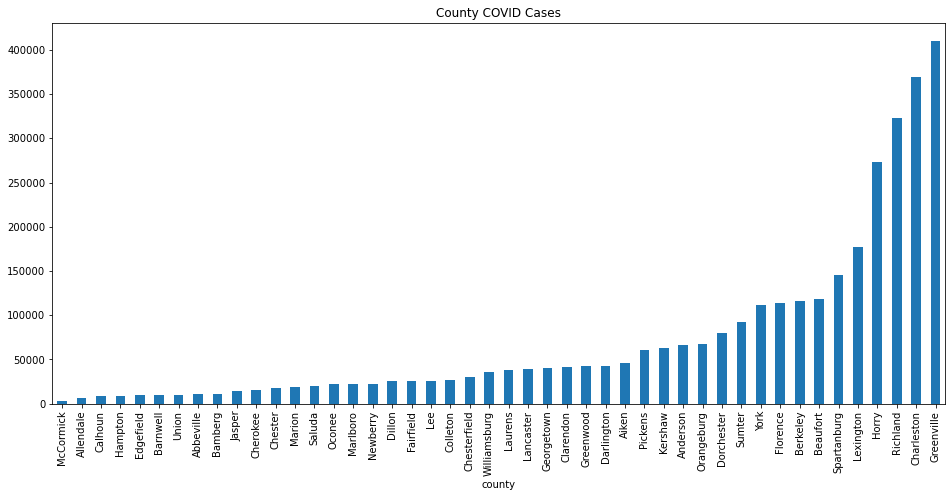

In [15]:
# Every day growth
df1.sort_values(ascending=True).plot.bar(figsize=(16,7), title='County COVID Cases')

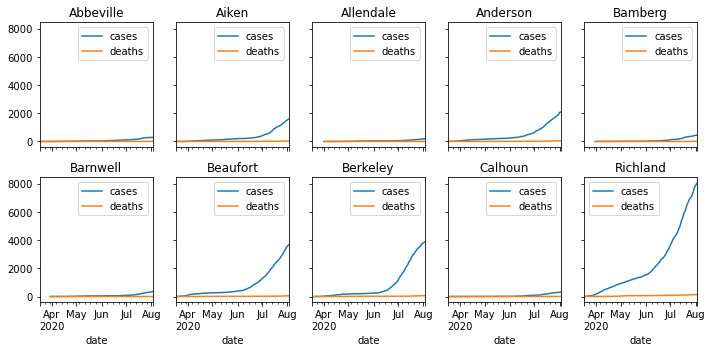

In [33]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10,5))

# Doing each of these manually (ugh)
df[df['county'] == 'Abbeville'].plot(legend=True, ax=ax1)
ax1.set_title("Abbeville")
df[df['county'] == 'Aiken'].plot(legend=True, ax=ax2)
ax2.set_title("Aiken")
df[df['county'] == 'Allendale'].plot(legend=True, ax=ax3)
ax3.set_title("Allendale")
df[df['county'] == 'Anderson'].plot(legend=True, ax=ax4)
ax4.set_title("Anderson")
df[df['county'] == 'Bamberg'].plot(legend=True, ax=ax5)
ax5.set_title("Bamberg")
df[df['county'] == 'Barnwell'].plot(legend=True, ax=ax6)
ax6.set_title("Barnwell")
df[df['county'] == 'Beaufort'].plot(legend=True, ax=ax7)
ax7.set_title("Beaufort")
df[df['county'] == 'Berkeley'].plot(legend=True, ax=ax8)
ax8.set_title("Berkeley")
df[df['county'] == 'Calhoun'].plot(legend=True, ax=ax9)
ax9.set_title("Calhoun")
df[df['county'] == 'Richland'].plot(legend=True, ax=ax10)
ax10.set_title("Richland")

# If you don't do tight_layout() you'll have weird overlaps
plt.tight_layout()

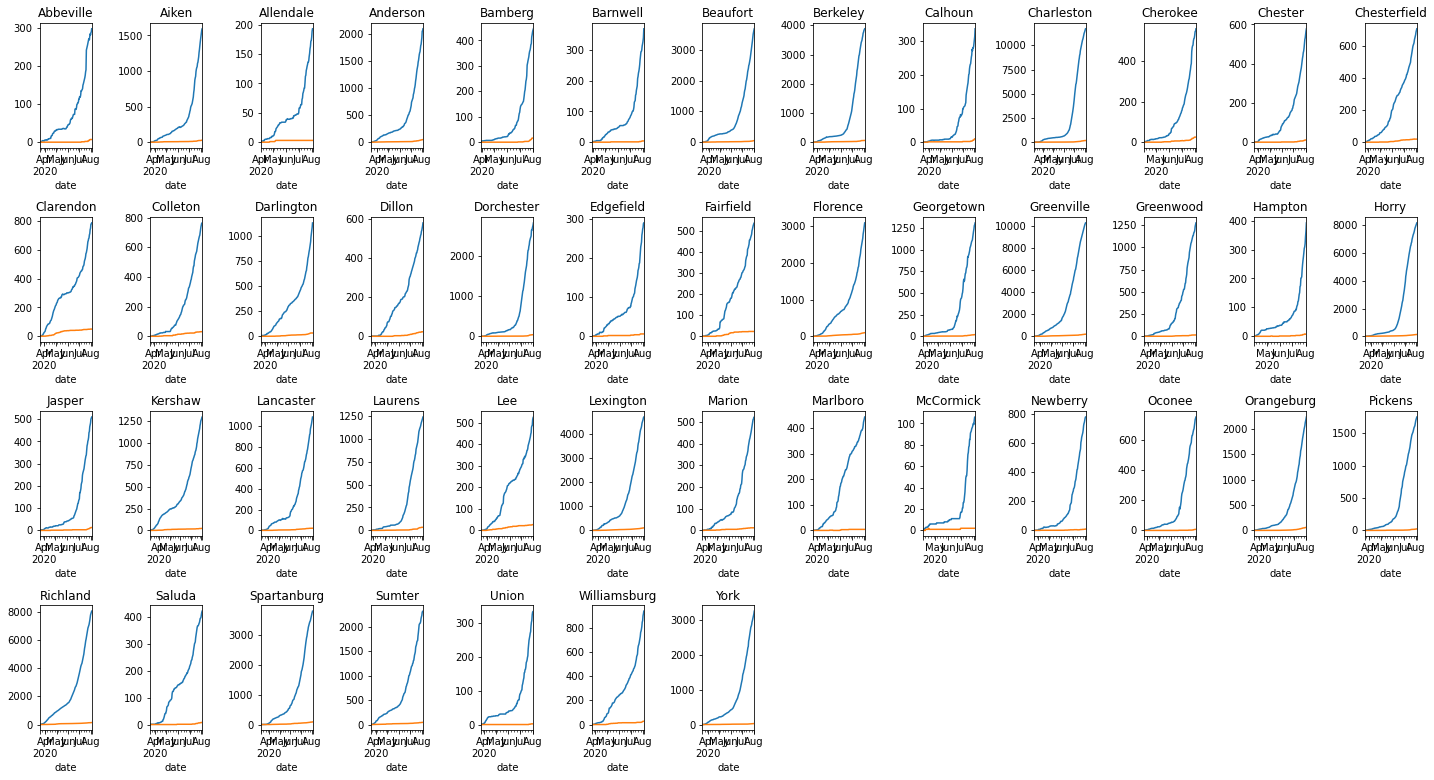

In [32]:
plt.figure(figsize=(20,40), facecolor='white')

# plot numbering starts at 1, not 0
plot_number = 1
for countryname, selection in df.groupby('county'):
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(15, 13, plot_number)
    selection.plot(ax=ax, label=countryname, legend=False)
    ax.set_title(countryname)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

county
Abbeville       AxesSubplot(0.125,0.125;0.775x0.755)
Aiken           AxesSubplot(0.125,0.125;0.775x0.755)
Allendale       AxesSubplot(0.125,0.125;0.775x0.755)
Anderson        AxesSubplot(0.125,0.125;0.775x0.755)
Bamberg         AxesSubplot(0.125,0.125;0.775x0.755)
Barnwell        AxesSubplot(0.125,0.125;0.775x0.755)
Beaufort        AxesSubplot(0.125,0.125;0.775x0.755)
Berkeley        AxesSubplot(0.125,0.125;0.775x0.755)
Calhoun         AxesSubplot(0.125,0.125;0.775x0.755)
Charleston      AxesSubplot(0.125,0.125;0.775x0.755)
Cherokee        AxesSubplot(0.125,0.125;0.775x0.755)
Chester         AxesSubplot(0.125,0.125;0.775x0.755)
Chesterfield    AxesSubplot(0.125,0.125;0.775x0.755)
Clarendon       AxesSubplot(0.125,0.125;0.775x0.755)
Colleton        AxesSubplot(0.125,0.125;0.775x0.755)
Darlington      AxesSubplot(0.125,0.125;0.775x0.755)
Dillon          AxesSubplot(0.125,0.125;0.775x0.755)
Dorchester      AxesSubplot(0.125,0.125;0.775x0.755)
Edgefield       AxesSubplot(0.125,0.125

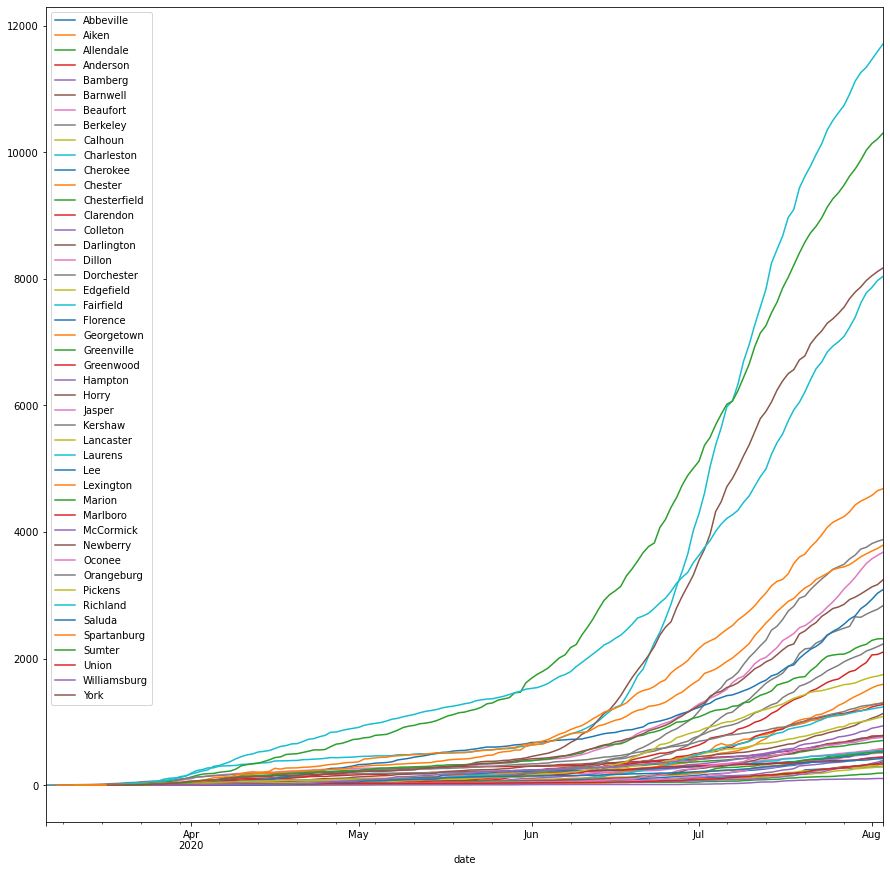

In [37]:
df.groupby('county')['cases'].plot(figsize=(15,15), legend=True)